<a href="https://colab.research.google.com/github/glennamaria/Projects/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Project.csv"
df= pd.read_csv(path)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display first few rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [6]:
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e

In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


<ipython-input-8-885901185943>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette=['green', 'red'])


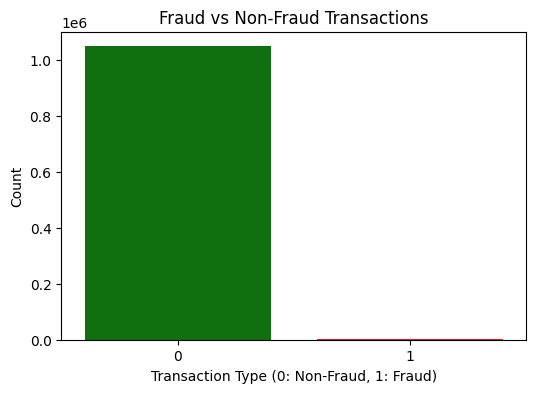

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, palette=['green', 'red'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()


<ipython-input-9-30d417128751>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette="coolwarm")


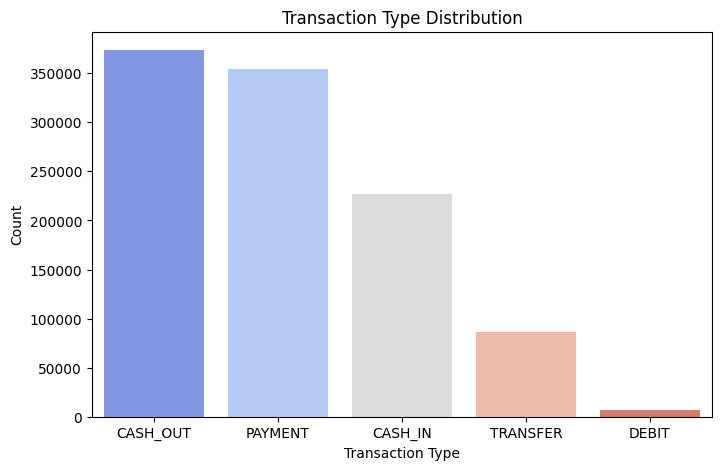

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette="coolwarm")
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


In [10]:
df['type'] = df['type'].astype('category').cat.codes  # Convert CASH-IN, CASH-OUT, etc. into numeric

<ipython-input-12-6239b5f36320>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette=['green', 'red'])


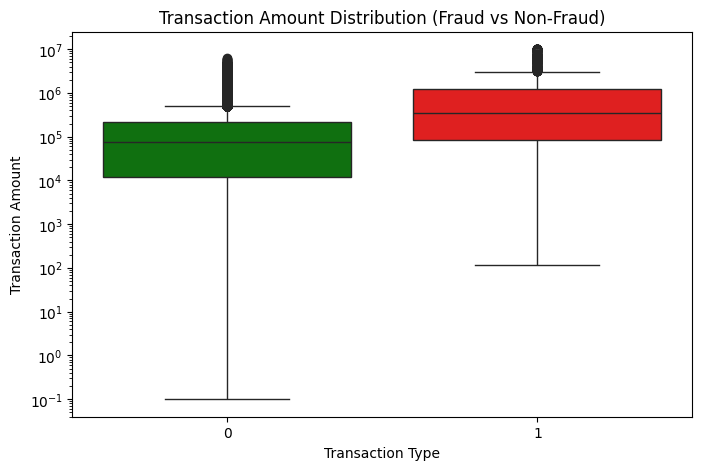

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=df, palette=['green', 'red'])
plt.title("Transaction Amount Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Log scale for better visualization
plt.show()


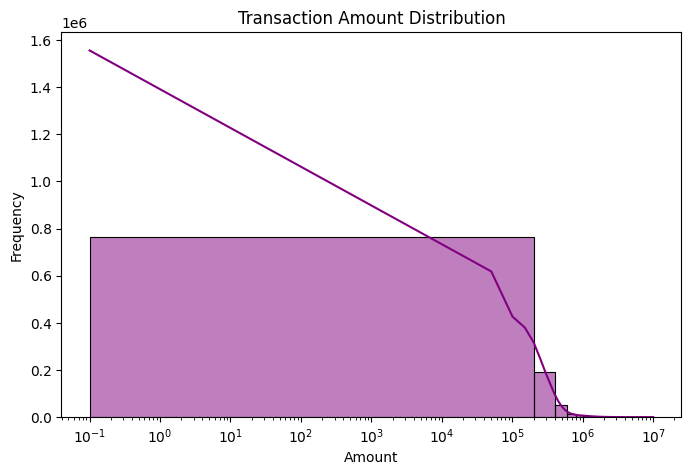

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True, color='purple')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xscale("log")  # Log scale to handle large values
plt.show()



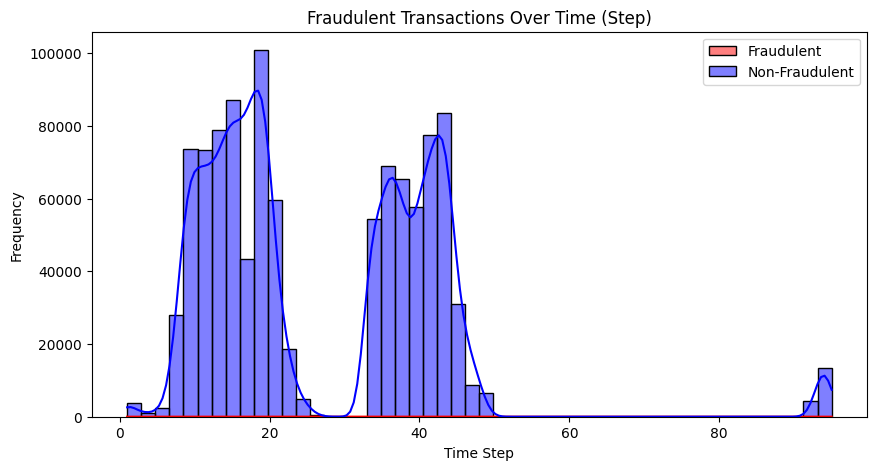

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['isFraud'] == 1]['step'], bins=50, kde=True, color='red', label="Fraudulent")
sns.histplot(df[df['isFraud'] == 0]['step'], bins=50, kde=True, color='blue', label="Non-Fraudulent")
plt.title("Fraudulent Transactions Over Time (Step)")
plt.xlabel("Time Step")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


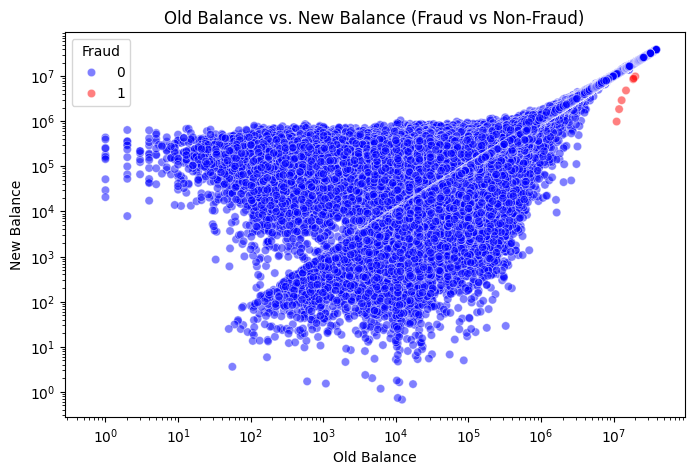

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['isFraud'], palette=['blue', 'red'], alpha=0.5)
plt.title("Old Balance vs. New Balance (Fraud vs Non-Fraud)")
plt.xlabel("Old Balance")
plt.ylabel("New Balance")
plt.xscale("log")
plt.yscale("log")
plt.legend(title="Fraud")
plt.show()


<ipython-input-17-193e1a71e0c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=df[df['isFraud'] == 1], palette='coolwarm')


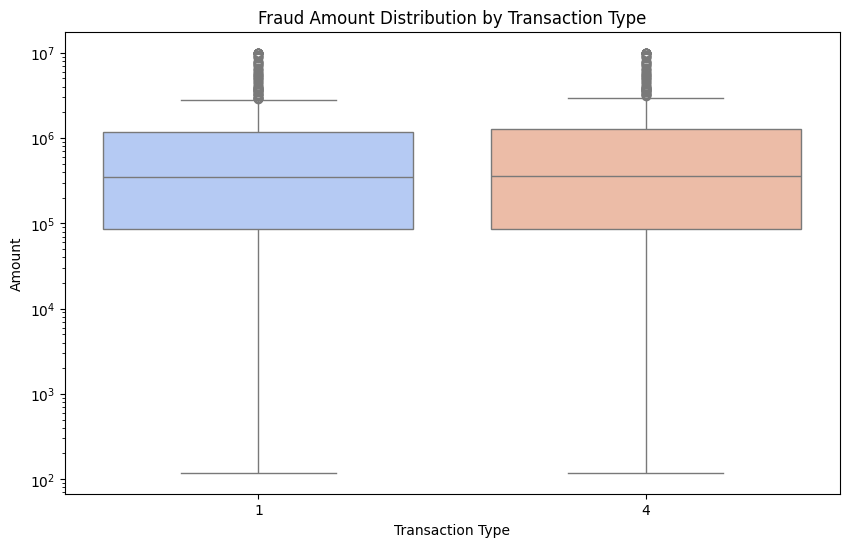

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df[df['isFraud'] == 1], palette='coolwarm')
plt.title("Fraud Amount Distribution by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.yscale("log")
plt.show()


In [18]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
